<a href="https://colab.research.google.com/github/pabbbbbb/HerramientasComputacionalesST/blob/main/6_2_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad

- **Nombre**: Pablo Rodarte
- **Matrícula**: A00827746

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

df = pd.read_csv("data/presion.csv")
df.head()

Mounted at /content/drive/
/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


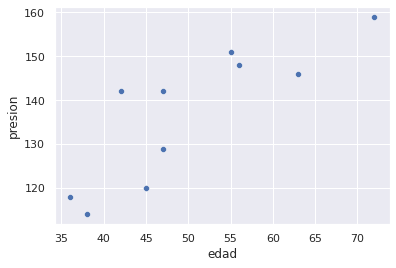

In [4]:
sns.scatterplot(data=df, x='edad', y='presion')

3. Genera una regresión lineal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [5]:
model = LinearRegression(fit_intercept=True)

x = df["edad"]
y = df["presion"]

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 100, 100)
yfit = model.predict(xfit[:, np.newaxis])

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.1483331897665603
Model intercept: 79.36850719269533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


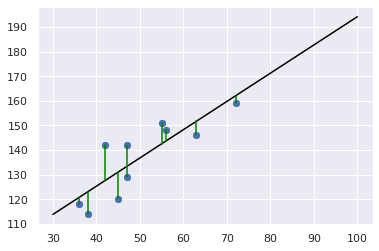

In [ ]:
plt.scatter(x, y)

plt.plot(x,y, 'o')
plt.plot(xfit, yfit, color="black");
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [ ]:
edad_calcular=76

def presion(edad):
  y= model.coef_[0]*edad + model.intercept_ 
  return y

presion(edad_calcular)

166.6418296149539

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [7]:
dfn = pd.read_csv("data/AdvmiNegocio.csv")
dfn.head()

,Unnamed: 0,Redes,Youtube,TV,sales
0,1,6903,1134,2076,663
1,2,1335,1179,1353,312
2,3,516,1377,2079,279
3,4,4545,1239,1755,555
4,5,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


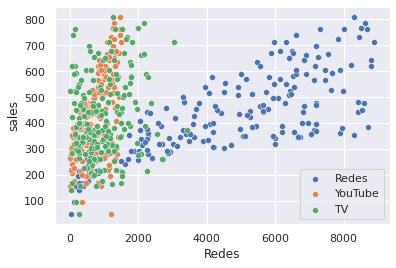

In [8]:
sns.scatterplot(data=dfn, x='Redes', y='sales', label="Redes")
sns.scatterplot(data=dfn, x='Youtube', y='sales', label="YouTube")
sns.scatterplot(data=dfn, x='TV', y='sales',label="TV")

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

*No hay relación obvia entre YouTube ni TV contra las ventas. Solamente Redes muestran relación positiva algo lineal, sin embargo, sigue habiendo mucho ruido en los datos.*

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept=True)

#para redes
y = dfn["sales"]
x = dfn["Redes"]
model.fit(x[:, np.newaxis], y)
xfit = np.copy(x)
yfit = model.predict(xfit[:, np.newaxis])

r = r2_score(y, yfit)

print("Redes Beta 1: ", model.coef_[0])
print("Redes Beta 0: ", model.intercept_)
print("Score:        ", r)
#para TV
x = dfn["TV"]
model.fit(x[:, np.newaxis], y)
xfit = np.copy(x)
yfit = model.predict(xfit[:, np.newaxis])

r = r2_score(y, yfit)

print("TV Beta 1: ", model.coef_[0])
print("TV Beta 0: ", model.intercept_)
print("Score:     ", r)
#para YouTube
x = dfn["Youtube"]
model.fit(x[:, np.newaxis], y)
xfit = np.copy(x)
yfit = model.predict(xfit[:, np.newaxis])

r = r2_score(y, yfit)

print("YouTube Beta 1: ", model.coef_[0])
print("YouTube Beta 0: ", model.intercept_)
print("Score:          ", r)

Redes Beta 1:  0.04753664043301975
Redes Beta 0:  210.97780647383084
Score:         0.611875050850071
TV Beta 1:  0.05469309847227337
TV Beta 0:  370.5422120783448
Score:      0.05212044544430494
YouTube Beta 1:  0.20249578339243968
YouTube Beta 0:  279.3491428547485
Score:           0.33203245544529536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

*En orden ascendente: TV y Sales: 0.052*

*YouTube y Sales: 0.33*

*Redes y Sales: 0.61*

*Esto quiere decir que el modelo que mejor se ajusta es el de Redes y Sales, lo cual nos ayuda a obtener una predicción más confiable que los otros modelos*

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [56]:
model = LinearRegression(fit_intercept=True)
#para redes y youtube
y = dfn["sales"]
x = dfn[["Redes","Youtube"]]

model.fit(x, y)
xfit = np.copy(x)
yfit = model.predict(xfit)

r = r2_score(y, yfit)

print("Score Redes y YouTube: ",r)
print("Beta 0:", model.intercept_)
print("Beta 1:    ", model.coef_[0])
print("Beta 2:    ", model.coef_[1])
print("R ajustada: ",1 - (1-r)*(len(y)-1)/(len(y)-xfit.shape[1]-1))
#redes y TV
x = dfn[["Redes","TV"]]

model.fit(x, y)
xfit = np.copy(x)
yfit = model.predict(xfit)

r = r2_score(y, yfit)

print("Score Redes y TV: ",r)
print("Beta 0:", model.intercept_)
print("Beta 1:    ", model.coef_[0])
print("Beta 2:    ", model.coef_[1])
print("R ajustada: ",1 - (1-r)*(len(y)-1)/(len(y)-xfit.shape[1]-1))
#YouTube y TV
x = dfn[["Youtube","TV"]]

model.fit(x, y)
xfit = np.copy(x)
yfit = model.predict(xfit)

r = r2_score(y, yfit)

print("Score YouTube y TV: ",r)
print("Beta 0:", model.intercept_)
print("Beta 1:    ", model.coef_[0])
print("Beta 2:    ", model.coef_[1])
print("R ajustada: ",1 - (1-r)*(len(y)-1)/(len(y)-xfit.shape[1]-1))
#3 variables
x = dfn[["Youtube","TV","Redes"]]

model.fit(x, y)
xfit = np.copy(x)
yfit = model.predict(xfit)

r = r2_score(y, yfit)

print("Score YouTube, TV y Redes: ",r)
print("Beta 0:", model.intercept_)
print("Beta 1:    ", model.coef_[0])
print("Beta 2:    ", model.coef_[1])
print("Beta 3:    ", model.coef_[2])
print("R ajustada: ",1 - (1-r)*(len(y)-1)/(len(y)-xfit.shape[1]-1))

Score Redes y YouTube:  0.8971942610828956
Beta 0: 87.63299737215414
Beta 1:     0.045754815101076145
Beta 2:     0.1879942266203092
R ajustada:  0.8961505479974428
Score Redes y TV:  0.6458354938293271
Beta 0: 173.24843903734896
Beta 1:     0.04690121389190708
Beta 2:     0.04421942424519284
R ajustada:  0.6422399150864777
Score YouTube y TV:  0.33270518395032256
Beta 0: 275.66761377589694
Beta 1:     0.19904459389696902
Beta 2:     0.006644174523281712
R ajustada:  0.3259306172899198
Score YouTube, TV y Redes:  0.8972106381789521
Beta 0: 88.16668108378241
Beta 1:     0.18853001691820448
Beta 2:     -0.001037493042476311
Beta 3:     0.04576464545539759
R ajustada:  0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

*De acuerdo a los datos obtenidos anteriormente, se puede concluir que el modelo mejor ajustado es el que incluye las 2 variables independientes de Redes y YouTube, ya que, tiene una r ajustada de 0.8961 y representa fuerte correlación lineal y, por ende, predicciones bastante confiables.*